### Problem Statement

🎉🎉 Attention all student data whizzes! We are beyond excited to kick off the "Data Science Student Championship 2023". This year's challenge? A real head-turner: Predicting the 'total_fare' for taxi rides! 🚖

 
As a student, you've undoubtedly hailed a ride when you're late for class or heading out for a late-night study session. Ever wondered how the total cost of your ride is determined? Well, it's time to switch gears from passenger to predictor. **In this thrilling hackathon, you'll put your data science skills to the ultimate test by predicting the total fare of a ride-hailing trip. 🎯**

 
This championship is designed not just to put your skills under the microscope, but to refine them, strengthen them, and prepare you for real-world problem-solving scenarios. And that's not all! You'll be delving into a fundamental issue in the world of transportation economics.

### Metadata
Here's a quick look at your toolbox for this challenge 🛠️💼📚:

* ⏱️ 'trip_duration': How long did the journey last? [in Seconds]
* 🛣️ 'distance_traveled': How far did the taxi travel? [in Km]
* 🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?
* 💵 'fare': What's the base fare for the journey?
* 💲 'tip': How much did the driver receive in tips?
* 🎀 'miscellaneous_fees': Were there any additional charges during the trip?
* 💰 'total_fare': The grand total for the ride (this is your prediction target!).
* ⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

In [1]:
# import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the Data...

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Check the Shape of the Data
train.shape, test.shape

((209673, 8), (89861, 8))

In [4]:
# Preview the Train and Test both
train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [5]:
# Test set has n-1 columns where n is the total number of columns in Train Dataset...
test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


**Inference: relation is Fare +tip+Misc_Fee = total_fare...**

### Exploratory Data Analysis

* Univariate Analysis
* Bivariate Analysis
* Missing Values
* Outlier Identification and Removal
* Feature Engineering
* Statistical Analysis
* Scaling/Transformation...

At this stage the data is ready for Modelling

### Model Building

* Base Models - Linear Regression, Decision Tree, Random Forest, Gradient Boosting Machines, Xtreme Gradient Boosting, CatboostRegressor, LightGBM.

Keep Submittting the Model Output and see which model gives you the lowest RMSE Possible.

* Once you know which model(s) have returned the lowest possible RMSE, then you can combine those models and build an ensemble on that. 

Like for e.g. you found that `Random Forest & Gradient Boosting` gave the lowest possible RMSE, you take those models and put it in **VotingRegressor Function**. This voting regressor will generate the output for both the models and will take the average of both the predictions and will generate the final prediction...

* `Cross Validation Models` - Take KFold Cross Validation for instance and you build all the models using Cross Validation. Remember train test split is a basic way of building the models. We always do the Cross Validation so that we can say that the predictions are accurate

* In order to maximise the performance of these models, you have to do the **Parameter Tuning of these models.**

### ML OPs - Deployment of the Machine Learning Model...

Machine Learning Operations are generally the segment in ML that is used to Deploy these application in the real world. For example you are building a taxi fare prediction model. You will take this inference and calculation done to put this in real world through mobile-app enabling customers finding the fare price with transparency using A.I. 

Some of the very popular platforms for deployment of ML Models - Streamlit,Heroku, (Django and Flask) apart from Cloud which is AWS or Azure etc...


**Note and area of brainstorming - Connecting SQL with Python..**

In [6]:
# Combine the Train and Test set

combined = pd.concat([train, test], ignore_index = True)

In [7]:
combined.shape

(299534, 8)

In [8]:
# Lets start with EDA and filter the data in the form of num and cat var.

combined.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [9]:
combined.select_dtypes(include = np.number).columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [10]:
num_vars =['trip_duration', 'distance_traveled', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare']

cat_vars = ['num_of_passengers', 'surge_applied']

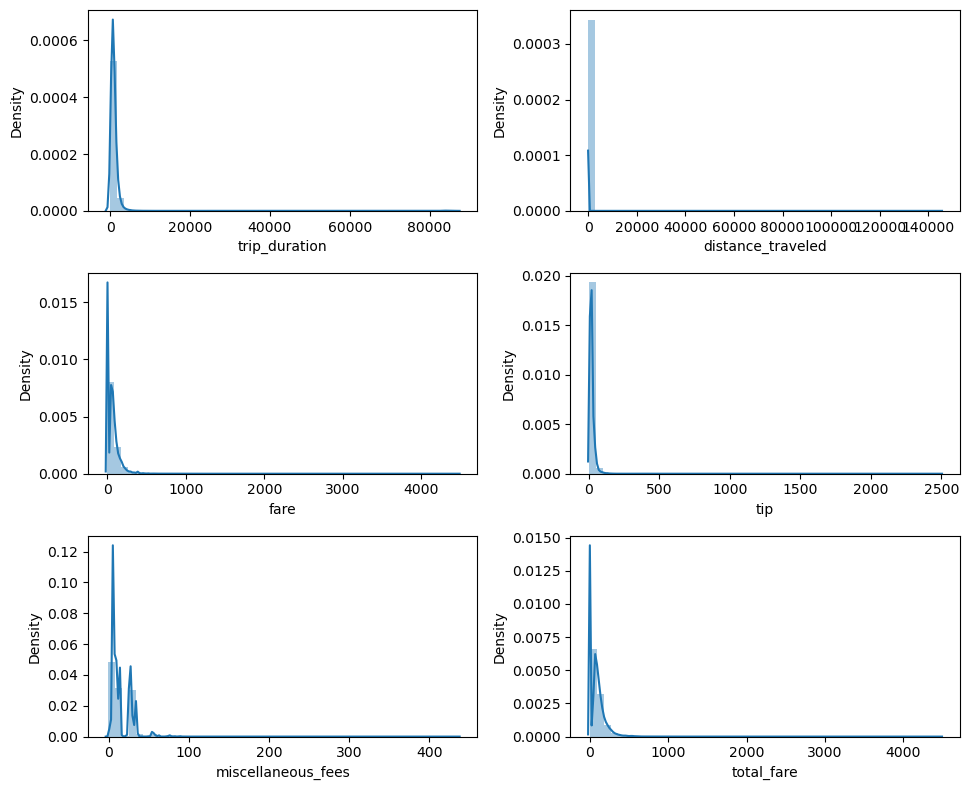

In [11]:
# num_vars - distplot

nrows = 3 # number of rows for the plot area
ncols = 2 # no of cols for the plot area...
iterator =1 # to initiate the plots using loop. Default Counter is 1...

plt.figure(figsize = (10, 8))
for i in num_vars:
    plt.subplot(nrows, ncols, iterator) # plot dimensions
    sns.distplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

Inference:

* Since the numerical variables comprise of fare and additional charges along with tip, the data is naturally bound to be Positively Skewed.

* Also, distance travelled can be min 0 but can't be negative and thus, we see that there is a positively skewed pattern in the data.

#### What exactly it means

It simply means, a lot of people are paying higher prices for the distance they travel.

Note: Time in seconds show 0 which is not possible. Therefore, we need to fix this pattern too.

In [12]:
# Run the Statistical Summary of the whole dataset...

train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


We also notice that trip_duration, num_of_passengers and fare is 0. We need to analyse this data separately.

<AxesSubplot:xlabel='num_of_passengers', ylabel='Density'>

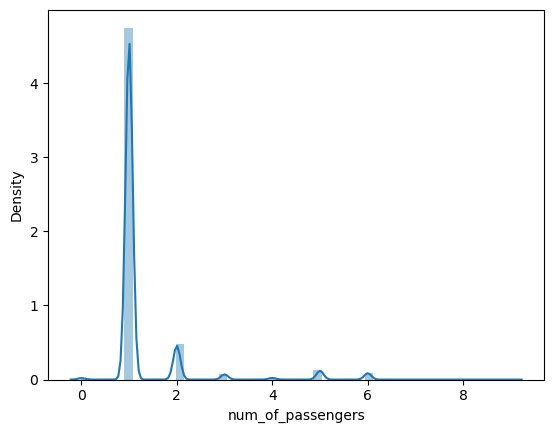

In [13]:
sns.distplot(combined.num_of_passengers)

In [14]:
# Pull the unique elements in the num_of_passengers...

print("Unique: ", combined.num_of_passengers.unique())
print("Unique_Surge: ", combined.surge_applied.unique())

Unique:  [1. 3. 2. 0. 6. 5. 4. 8. 7. 9.]
Unique_Surge:  [0 1]


<AxesSubplot:xlabel='num_of_passengers', ylabel='count'>

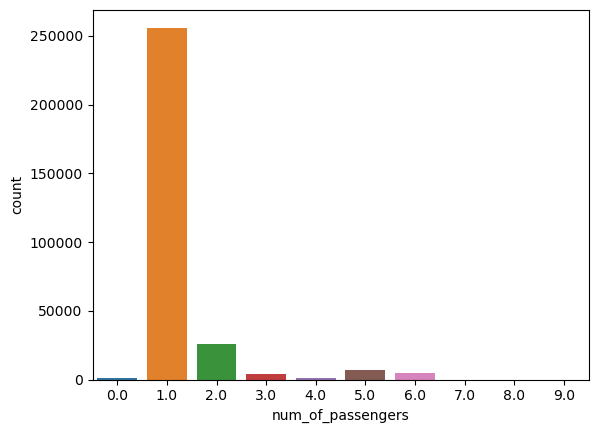

In [15]:
# no_of_passengers
sns.countplot(combined.num_of_passengers)

In [16]:
combined.num_of_passengers.value_counts()

1.0    256094
2.0     25601
5.0      6642
6.0      4806
3.0      3925
4.0      1281
0.0      1129
8.0        39
9.0        11
7.0         6
Name: num_of_passengers, dtype: int64

In [17]:
# what about fare where the num of passengers is 0
train.loc[(train.num_of_passengers==0) & (train.fare==0)]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
17190,56.0,1.29,0.0,0.0,0,0.00,0.00,0
36846,1600.0,4.18,0.0,0.0,0,0.00,0.00,0
75581,45.0,0.16,0.0,0.0,0,0.00,0.00,0
89187,1679.0,9.98,0.0,0.0,0,3.75,3.75,0
126357,86.0,1.45,0.0,0.0,0,0.00,0.00,0
157026,1386.0,6.92,0.0,0.0,0,0.00,0.00,0
169598,78.0,0.64,0.0,0.0,0,0.00,0.00,0
170282,87.0,11.10,0.0,0.0,0,0.00,0.00,0
208707,2443.0,6.92,0.0,0.0,0,0.00,0.00,0


<AxesSubplot:xlabel='surge_applied', ylabel='count'>

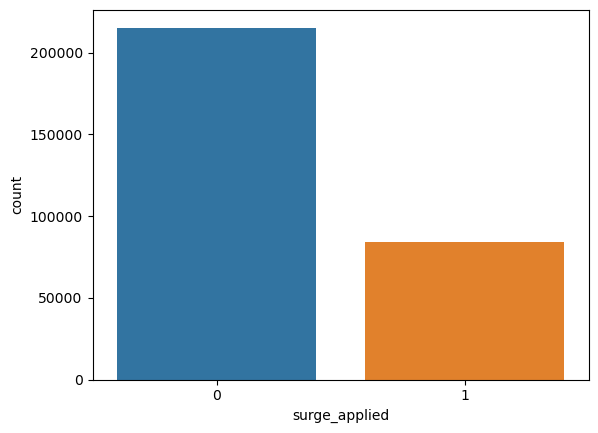

In [18]:
# Surge 
sns.countplot(combined.surge_applied)

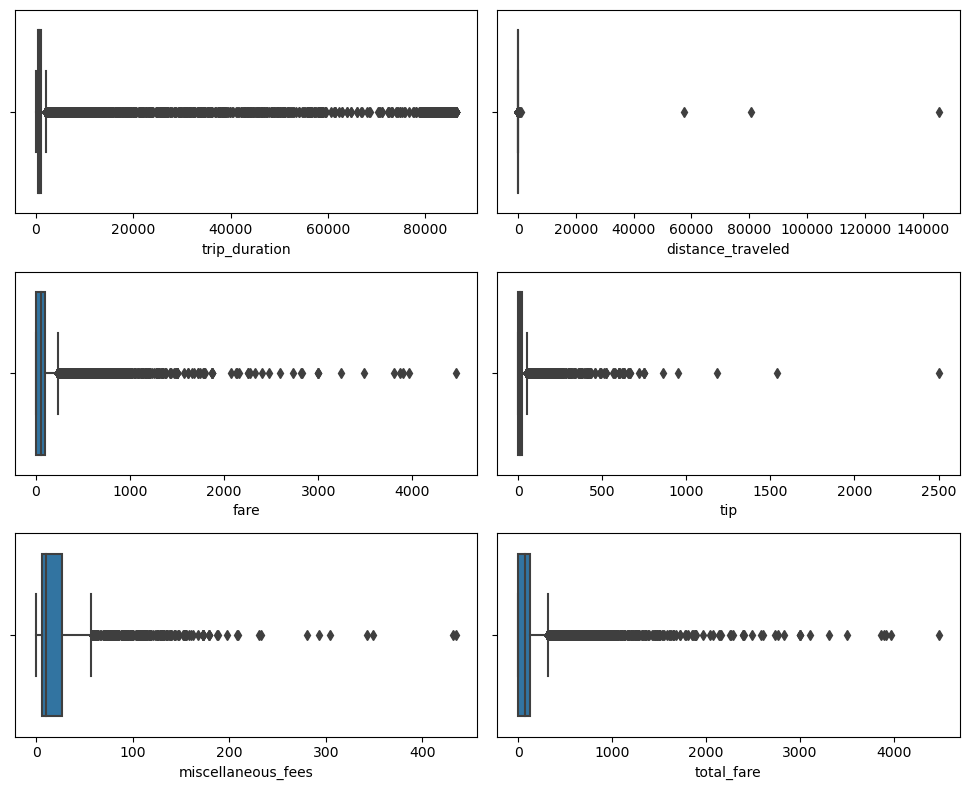

In [19]:
# Lets find the Outliers in the Data

# num_vars - Boxplot

nrows = 3 # number of rows for the plot area
ncols = 2 # no of cols for the plot area...
iterator =1 # to initiate the plots using loop. Default Counter is 1...

plt.figure(figsize = (10, 8))
for i in num_vars:
    plt.subplot(nrows, ncols, iterator) # plot dimensions
    sns.boxplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

### Bivariate Analysis

* Num vs Num - Scatterplot
* Cat vs Num - Boxplot/Violinplot/barplot

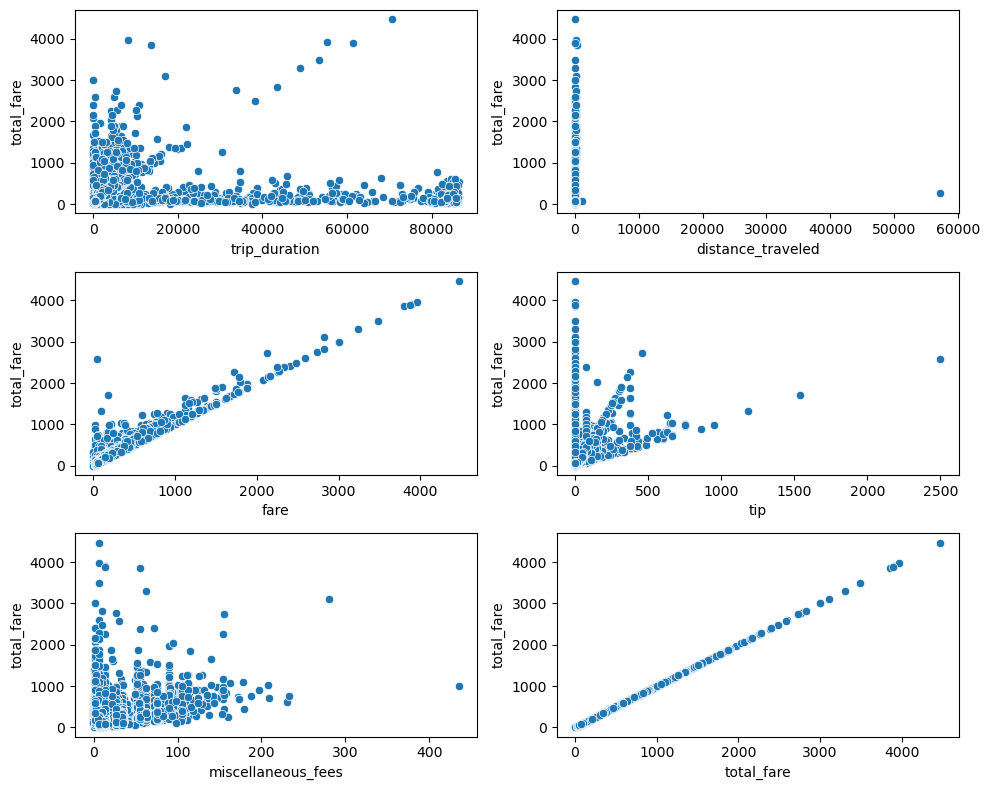

In [20]:
# Bivariate:: Num vs Num

nrows = 3 # number of rows for the plot area
ncols = 2 # no of cols for the plot area...
iterator =1 # to initiate the plots using loop. Default Counter is 1...

plt.figure(figsize = (10, 8))
for i in num_vars:
    plt.subplot(nrows, ncols, iterator) # plot dimensions
    sns.scatterplot(train.loc[:, i], train.total_fare)
    iterator = iterator+1

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='num_of_passengers', ylabel='fare'>

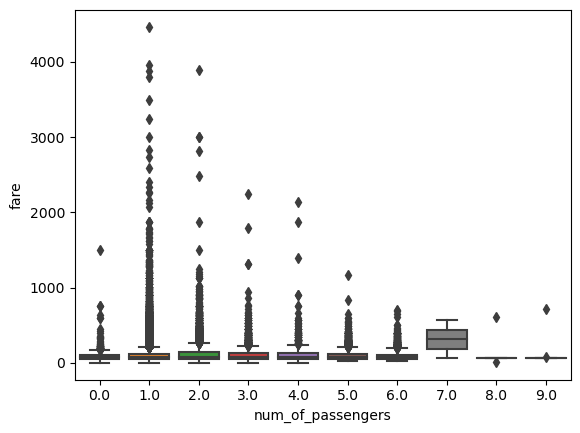

In [21]:
# Boxplot for Cat vs Num

sns.boxplot(x = "num_of_passengers", y = "fare", data =train)

In [22]:
train.groupby(['num_of_passengers'])['fare','distance_traveled','trip_duration'].max()

,fare,distance_traveled,trip_duration
num_of_passengers,,,
0.0,1500.000,89.32,4898.0
1.0,4466.250,57283.91,86387.0
2.0,3896.250,109.44,86213.0
3.0,2250.000,109.77,86199.0
4.0,2137.500,49.68,85783.0
5.0,1170.000,45.42,86307.0
6.0,701.250,49.94,85821.0
7.0,562.500,17.33,1196.0
8.0,606.750,15.80,2493.0


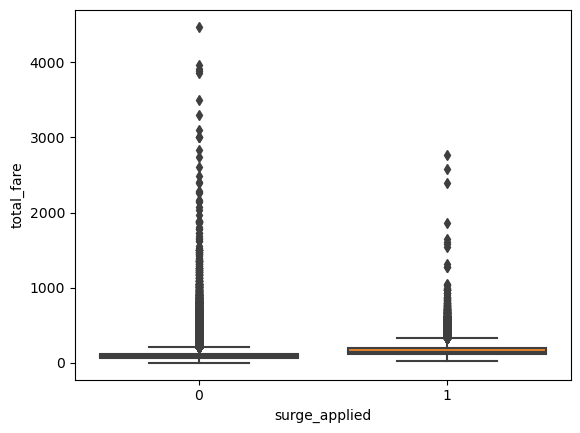

In [23]:
# Surge vs Total Fare
sns.boxplot(x = "surge_applied", y = "total_fare", data = train)
plt.show()

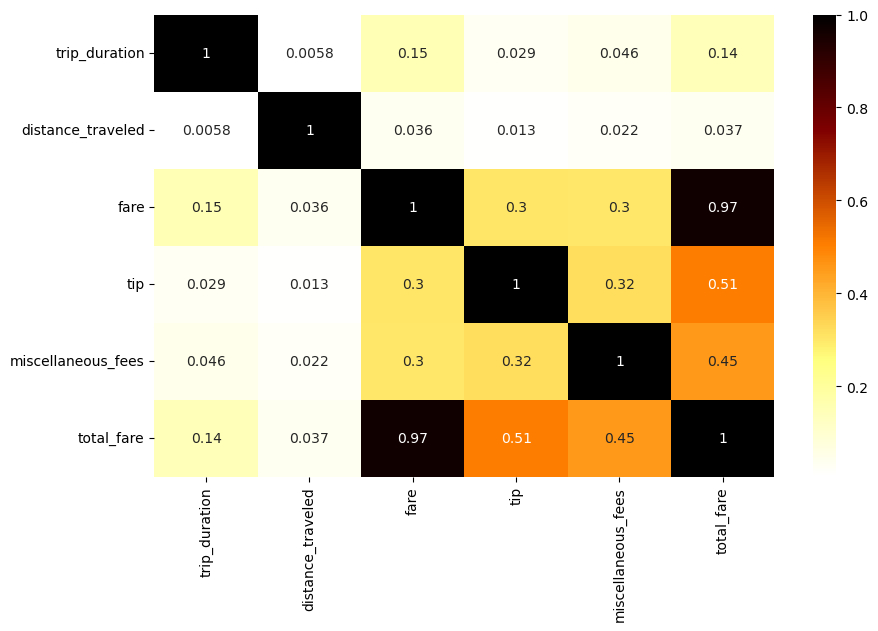

In [24]:
# Correlation Plot

plt.figure(figsize = (10, 6))
sns.heatmap(train.loc[:, num_vars].corr(), annot = True, cmap = "afmhot_r")
plt.show()

#### Inference of Correlation Heatmap
* We notice that there is not strong correlation between the predictors and the target...
* Fare has very weak correlation with distance travelled and the trip duration...

In [25]:
# Missing Values in the Data
combined.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

### Outlier Removal

* Boxplot IQR technique and check the correlation
* Winsorization & Check the Correlation

Note: The Boxplot method is applied only on Train Dataset wherein the Winsorization can be applied on Train & test Combined.

In [26]:
# IQR method
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1

upper_lim = q3+1.5*iqr
lower_lim = q1-1.5*iqr

In [27]:
# Remove the Outliers from the data....
wt_outliers = \
train.loc[~((train<lower_lim)|(train>upper_lim)).any(axis = 1)]

In [28]:
train.shape[0]-158838 # Machine learns pattern from the training set.

50835

In [29]:
test.shape # Machine will test its learning on the test set...

(89861, 8)

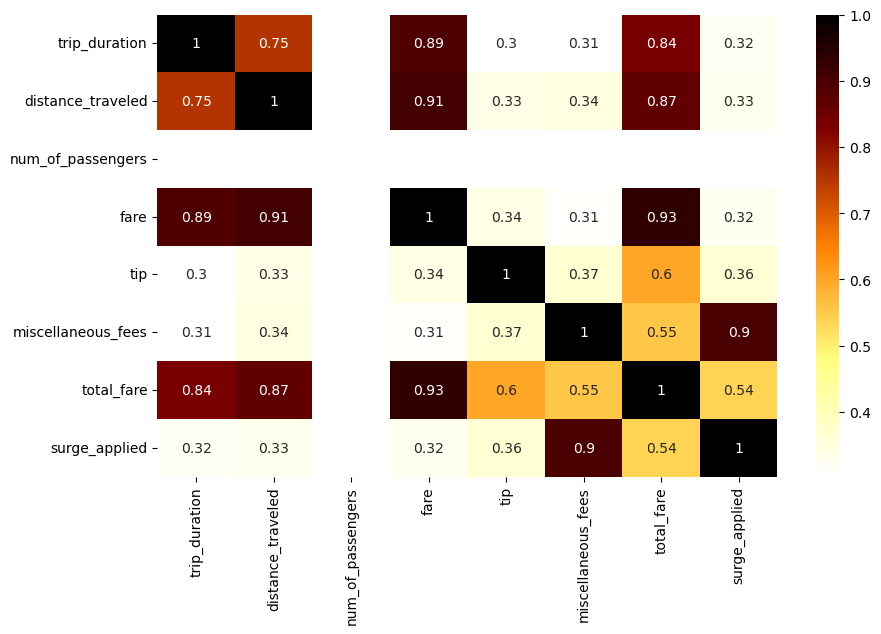

In [30]:
# Check the Correlation for the new data ~ wt_outlier

plt.figure(figsize = (10, 6))
sns.heatmap(wt_outliers.corr(), 
            annot = True, cmap = "afmhot_r")
plt.show()

`New Lesson: If the data has lots of outliers and the correlation is very weak with the target. One must remove the Outliers because it might improve the Correlation with the target massively.`

### Winsorization 

* It is a concept where the we cap the values. Capping the values means that the Outliers will be capped/maxed out to let say 0.95. It looks like trimming of the data from top and bottom selectively.

In [31]:
# Apply Winsorization
from scipy.stats.mstats import winsorize # input array, limit percent for cutting the data

new = combined.copy()
for i in new.columns:
    # Capping the Data to 99%.
    winsorized_data = winsorize(a = new.loc[:, i], limits=(0.01, 0.01))
    new[i+"_winsorized"] = winsorized_data

In [32]:
new.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied',
       'trip_duration_winsorized', 'distance_traveled_winsorized',
       'num_of_passengers_winsorized', 'fare_winsorized', 'tip_winsorized',
       'miscellaneous_fees_winsorized', 'total_fare_winsorized',
       'surge_applied_winsorized'],
      dtype='object')

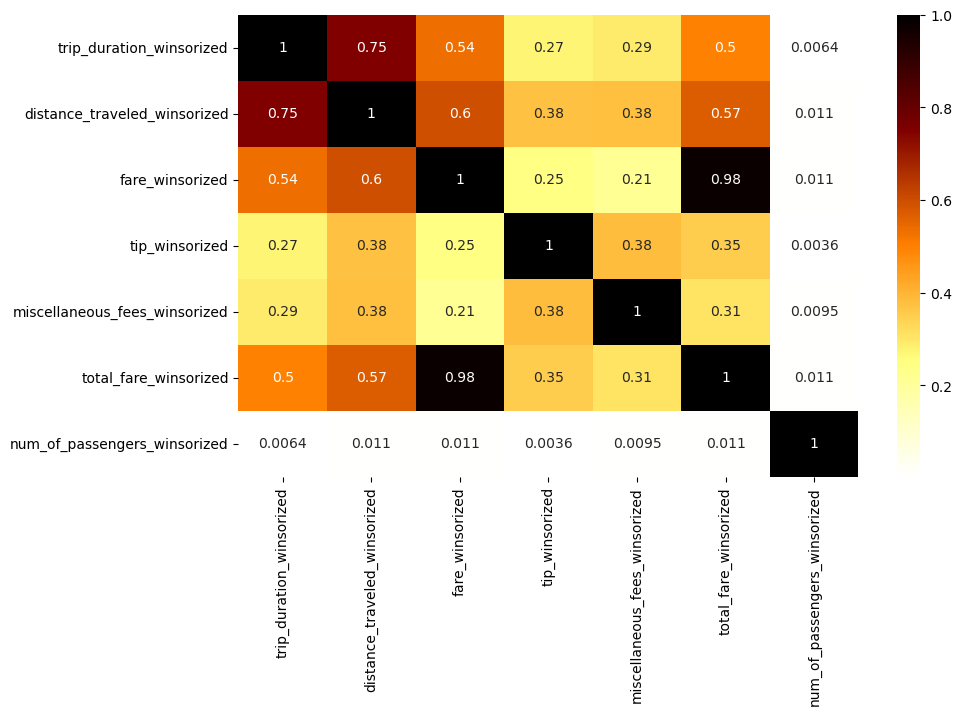

In [33]:
# Winsorized Data - Heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(new.loc[:, ['trip_duration_winsorized', 'distance_traveled_winsorized',
                        'fare_winsorized', 'tip_winsorized',
                        'miscellaneous_fees_winsorized', 'total_fare_winsorized',
                       'num_of_passengers_winsorized']].\
            corr(), annot = True, cmap = "afmhot_r")
plt.show()

### Summary of the Findings - IQR vs Winsorization

* We clearly see that the IQR method win hands down because although we lost some percentage of data in IQR approach however, we see that the correlation has massively improved.

* On the other hand, by limiting the data to 99% in winsorization technique, we see that the correlation has improved decently.

Therefore, we will be using `wt_outliers` data instead of **new** dataset created in the latter code.

### Feature Engineering

In [34]:
wt_outliers.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
5,355.0,1.74,1.0,45.00,0,26.625,71.625,1


In [35]:
# Trip Duration/3600 ~ hours as it has given in the seconds 
wt_outliers["trip_hours"] = wt_outliers["trip_duration"]/3600
test["trip_hours"] = test["trip_duration"]/3600

In [36]:
# Drop the Num of Passengers and Passenger Cat from wt_outliers and test set
# Becuase as the number of passengers is increasing fare is decreasing which is not ideally correct .
wt_outliers.drop("num_of_passengers", axis = 1, inplace = True)
test.drop("num_of_passengers", axis = 1, inplace = True)

In [37]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611


In [38]:
## Tip - where the tip is 0, we can create a dummy variable - Tip and No Tip

def tipping(x):
    if x==0:
        return("No_Tip")
    else:
        return("Tip")

In [39]:
wt_outliers["tip_cat"] = wt_outliers.tip.apply(tipping)

In [40]:
test["tip_cat"] = test.tip.apply(tipping)

In [41]:
wt_outliers.groupby("tip_cat")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
tip_cat,,,,,,,,
No_Tip,69949.0,75.781087,36.554899,0.0,48.75,67.5,97.50,210.0
Tip,88889.0,80.557617,34.939973,0.0,52.50,75.0,101.25,210.0


In [42]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778,Tip
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722,Tip
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778,No_Tip
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389,Tip
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611,No_Tip


In [43]:
# median of tip and misc fee  #Median of extra cost other than fare .
wt_outliers["travel_cost"] = wt_outliers.loc[:, ["tip", "miscellaneous_fees"]].median(axis=1)

test["travel_cost"] = test.loc[:, ["tip", "miscellaneous_fees"]].median(axis = 1)

In [44]:
# Travel Cost and Distance Travelled Avg
wt_outliers["dist_travel_cost"] = wt_outliers.loc[:, ["travel_cost", "distance_traveled"]].\
median(axis=1)

test["dist_travel_cost"] = test.loc[:, ["travel_cost", "distance_traveled"]].\
median(axis=1)

In [45]:
# distance travelled * trip_hours (Interaction effect)
wt_outliers["magic1"] = wt_outliers["distance_traveled"]*wt_outliers["trip_hours"]

test["magic1"] = test["distance_traveled"]*test["trip_hours"]

In [46]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat,travel_cost,dist_travel_cost,magic1
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778,Tip,15.1500,8.95000,0.571389
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722,Tip,18.6000,11.01500,1.130947
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778,No_Tip,13.3125,8.21625,0.632667
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389,Tip,12.6000,7.34500,0.191003
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611,No_Tip,13.3125,7.52625,0.171583


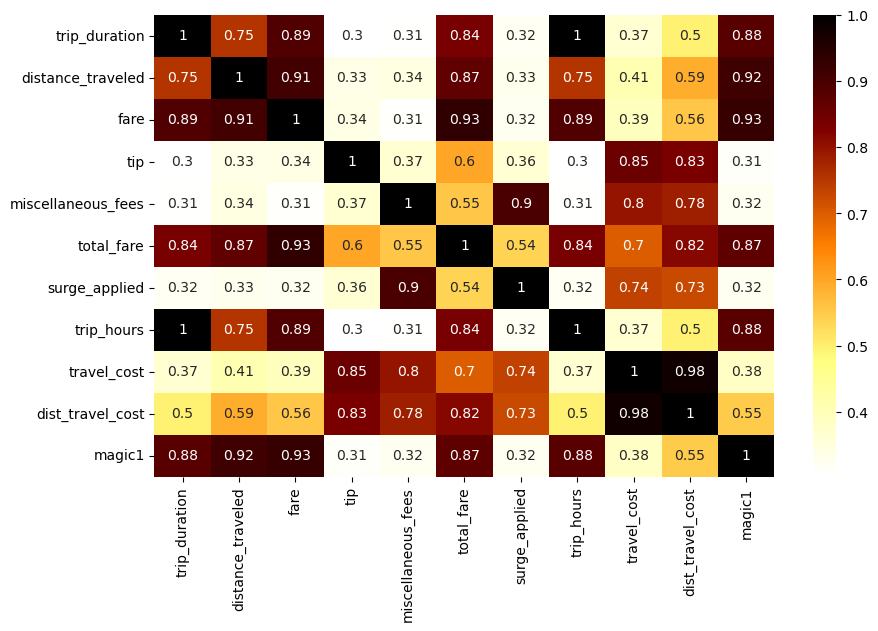

In [47]:
plt.figure(figsize = (10, 6))
sns.heatmap(wt_outliers.corr(), 
            annot = True, cmap = "afmhot_r")
plt.show()

In [48]:
wt_outliers.distance_traveled.describe()
# 0-2.5:Vicinity, 2.5-5: Close, 5-7.5: Far, 7.5-10: Distant, > 10: Remote

count    158838.000000
mean          3.510818
std           2.315952
min           0.020000
25%           1.830000
50%           2.900000
75%           4.600000
max          11.390000
Name: distance_traveled, dtype: float64

In [49]:
def distance(x):
    if x<=2.5:
        return("Vicinity")
    elif x<=5:
        return("Close")
    elif x<=7.5:
        return("Far")
    elif x<=10:
        return("Distant")
    else:
        return("Remote")

In [50]:
wt_outliers["distance_cat"]= wt_outliers.distance_traveled.apply(distance)

In [51]:
test["distance_cat"] = test.distance_traveled.apply(distance)

In [52]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat,travel_cost,dist_travel_cost,magic1,distance_cat
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778,Tip,15.1500,8.95000,0.571389,Close
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722,Tip,18.6000,11.01500,1.130947,Close
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778,No_Tip,13.3125,8.21625,0.632667,Close
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389,Tip,12.6000,7.34500,0.191003,Vicinity
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611,No_Tip,13.3125,7.52625,0.171583,Vicinity


## Statistical Hypothesis Testing....

In [53]:
wt_outliers.select_dtypes(include = np.number).columns

Index(['trip_duration', 'distance_traveled', 'fare', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied', 'trip_hours',
       'travel_cost', 'dist_travel_cost', 'magic1'],
      dtype='object')

In [54]:
num_vars = ['trip_duration', 'distance_traveled',  'tip',
       'miscellaneous_fees', 'total_fare', 'trip_hours',
       'travel_cost', 'dist_travel_cost', 'magic1']

In [55]:
# Ho: That the Predictor(s) var & target var is independent of each other.
# This means one does not affect the other. In other words, the predictors 
# dont contribute in predicting the target variable.

# Ha: Ho is False. The predictor is a significant feature for the target.

import scipy.stats as stats

for i in num_vars:
    teststats, pvalue = stats.ttest_ind(wt_outliers.loc[:, i], wt_outliers.fare)
    print("PValue for ", i, " Var is: ", np.round(pvalue, 4))    

PValue for  trip_duration  Var is:  0.0
PValue for  distance_traveled  Var is:  0.0
PValue for  tip  Var is:  0.0
PValue for  miscellaneous_fees  Var is:  0.0
PValue for  total_fare  Var is:  0.0
PValue for  trip_hours  Var is:  0.0
PValue for  travel_cost  Var is:  0.0
PValue for  dist_travel_cost  Var is:  0.0
PValue for  magic1  Var is:  0.0


Since the PValue for each predictor is 0 which is less than 0.05 (alpha). We can say that the features are Significant

In [56]:
# Surge_applied, tip
wt_outliers.tip_cat.unique() # Remember that uptil 2 categories, we can apply TTest
# But as we see there are > 2 categories, thats where we bring Anova..

array(['Tip', 'No_Tip'], dtype=object)

In [57]:
# Where the Tip==y, fare and Tip==N, fare

yes = wt_outliers.loc[wt_outliers.tip_cat=="Tip", "fare"]
no = wt_outliers.loc[wt_outliers.tip_cat=="No_Tip", "fare"]

# Ho: That the Tip_Cat has no relation with the Fare
# Ha: Tip_Cat var has a relation with the fare.
# It means that tip_Cat contributes in predicting the fare price

stats.ttest_ind(yes, no)

# Conclusion: Since the PValue is less than 0.05, We Reject the Ho
# Meaning Tip_Cat is a significant feature for the Target variable.

Ttest_indResult(statistic=26.501271631925103, pvalue=2.0365892640545085e-154)

In [58]:
zero = wt_outliers.loc[wt_outliers.surge_applied==0, "fare"]
one = wt_outliers.loc[wt_outliers.surge_applied==1, "fare"]

stats.ttest_ind(zero, one)

# Conclusion: surge is a significant predictor for the target

Ttest_indResult(statistic=-135.18360882389516, pvalue=0.0)

In [59]:
wt_outliers.distance_cat.unique()

array(['Close', 'Vicinity', 'Far', 'Distant', 'Remote'], dtype=object)

In [60]:
# Since it has more than 2 Categories...we apply Anova Test to verify the sig.

import statsmodels.formula.api as sfa
model = sfa.ols("fare~distance_cat", data = wt_outliers).fit()

In [61]:
# Anova Table

from statsmodels.stats.anova import anova_lm
anova_lm(model)

# Conclusion: Since the PValue of the F Test is less than alpha
# We Reject the Ho meaning the dist_cat is a significant feature for the target.

,df,sum_sq,mean_sq,F,PR(>F)
distance_cat,4.0,1.558616e+08,3.896541e+07,131639.152329,0.0
Residual,158833.0,4.701484e+07,2.960017e+02,NaN,NaN


In [62]:
from scipy import stats
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

train['num_of_passengers'] = train['num_of_passengers'].astype('object')

model = sfa.ols("fare~num_of_passengers", data = train).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
num_of_passengers,9.0,5.795755e+06,643972.804997,88.209483,9.195357e-165
Residual,209663.0,1.530643e+09,7300.494019,NaN,NaN


## One Hot Encoding of Categorical Var

In [63]:
wt_outliers.columns

Index(['trip_duration', 'distance_traveled', 'fare', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied', 'trip_hours',
       'tip_cat', 'travel_cost', 'dist_travel_cost', 'magic1', 'distance_cat'],
      dtype='object')

In [64]:
# Converting the cat into numbers

dummytrain = pd.get_dummies(wt_outliers, drop_first = True)
dummytest= pd.get_dummies(test, drop_first = True)

In [65]:
dummytest.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Distant,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity
0,1076.0,4.18,0,0,13.500,0,0,0.298889,6.7500,5.46500,1.249356,0,0,0,0,0
1,429.0,1.48,0,0,13.500,0,0,0.119167,6.7500,4.11500,0.176367,0,0,0,0,1
2,856.0,4.15,0,24,6.000,0,0,0.237778,15.0000,9.57500,0.986778,1,0,0,0,0
3,622.0,3.22,0,15,5.625,0,0,0.172778,10.3125,6.76625,0.556344,1,0,0,0,0
4,507.0,3.98,0,0,2.250,0,0,0.140833,1.1250,2.55250,0.560517,0,0,0,0,0


In [66]:
# X and y
X = dummytrain.drop(['fare', 'total_fare', 'trip_duration'], axis = 1)
y = dummytrain.fare

dummytest.drop(['fare', 'total_fare', 'trip_duration'], axis = 1, inplace = True)

In [67]:
X.head()

,distance_traveled,tip,miscellaneous_fees,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Distant,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity
0,2.75,24,6.300,0,0.207778,15.1500,8.95000,0.571389,1,0,0,0,0
1,3.43,24,13.200,0,0.329722,18.6000,11.01500,1.130947,1,0,0,0,0
2,3.12,0,26.625,1,0.202778,13.3125,8.21625,0.632667,0,0,0,0,0
4,2.09,12,13.200,0,0.091389,12.6000,7.34500,0.191003,1,0,0,0,1
5,1.74,0,26.625,1,0.098611,13.3125,7.52625,0.171583,0,0,0,0,1


In [68]:
X.describe()

,distance_traveled,tip,miscellaneous_fees,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Distant,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity
count,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.000000,158838.00000
mean,3.510818,10.722321,13.864569,0.265698,0.198685,12.293445,7.902131,0.891182,0.559620,0.057486,0.133085,0.020770,0.41847
std,2.315952,11.674307,10.037665,0.441706,0.110832,8.986491,5.079239,0.989048,0.496434,0.232770,0.339668,0.142613,0.49331
min,0.020000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.830000,0.000000,6.000000,0.000000,0.116389,4.875000,3.850000,0.217300,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.900000,9.000000,9.750000,0.000000,0.179167,10.500000,6.570000,0.523803,1.000000,0.000000,0.000000,0.000000,0.00000
75%,4.600000,18.000000,26.200000,1.000000,0.260278,17.062500,11.035937,1.187751,1.000000,0.000000,0.000000,0.000000,1.00000
max,11.390000,50.000000,56.500000,1.000000,0.576667,52.725000,31.813750,6.506392,1.000000,1.000000,1.000000,1.000000,1.00000


## Model Building

* Base Model - Avg
* Linear Regression Model
* Random Forest Model
* Gradient Boosting
* XGboost

In [73]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kfold = KFold(n_splits =5, shuffle = True, random_state = 42)
lr = LinearRegression()

In [74]:
# 5 CV LR Model

pred = [] # all the prediction values will be stored here.

for train_index, test_index in kfold.split(X, y): # Splitting the Data in 5 folds
    xtrain = X.iloc[train_index] # use iloc for the index numbers
    ytrain = y.iloc[train_index] # Do the Direct Prediction on the Dummytest
    pred.append(lr.fit(xtrain, ytrain).predict(dummytest))

In [75]:
test["fare"] = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [76]:
# Final var
total_fare = test["fare"]+test["tip"]+test["miscellaneous_fees"]

# Submission File
submission = pd.DataFrame({'total_fare':total_fare})

In [68]:
# Export it outside
submission.to_csv("LRModel.csv", index = False) # RMSE: 0.29

In [69]:
cd

C:\Users\Lenovo


In [70]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()

pred_rf = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [71]:
# GBM
gbm = GradientBoostingRegressor()

pred_gbm = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain,ytrain).predict(dummytest))

In [88]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=80)

pred_xgb = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(dummytest))

In [89]:
# Submission of XGB Model
total = np.abs(pd.DataFrame(pred_xgb).T.mean(axis = 1))

test["fare"] = total

total_fare = test["fare"]+test["tip"]+test["miscellaneous_fees"]

submission = pd.DataFrame({"total_fare":total_fare})

In [90]:
# Export it outside
submission.to_csv("XGB.csv", index=False) # RMSE 0.18400

In [79]:
from sklearn.metrics import mean_squared_errord

In [73]:
!pip install lightgbm

In [74]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

pred_lgbm = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(dummytest))

In [75]:
# Submission of Random Forest Model
total = np.abs(pd.DataFrame(pred_rf).T.mean(axis = 1))

test["fare"] = total

total_fare = test["fare"]+test["tip"]+test["miscellaneous_fees"]

submission = pd.DataFrame({"total_fare":total_fare})

In [76]:
# Export it outside
submission.to_csv("RandomForest.csv", index=False) # 0.18486

In [77]:
# Submission of Gradient Boosting Model
total = np.abs(pd.DataFrame(pred_gbm).T.mean(axis = 1))

test["fare"] = total

total_fare = test["fare"]+test["tip"]+test["miscellaneous_fees"]

submission = pd.DataFrame({"total_fare":total_fare})

In [78]:
# Export it outside
submission.to_csv("GBM.csv", index=False)

In [81]:
# Submission of LGBM Model
total = np.abs(pd.DataFrame(pred_lgbm).T.mean(axis = 1))

test["fare"] = total

total_fare = test["fare"]+test["tip"]+test["miscellaneous_fees"]

submission = pd.DataFrame({"total_fare":total_fare})

In [82]:
# Export it outside
submission.to_csv("LGBM.csv", index=False) # RMSE 0.18701

### Tuning of Parameters for XGB Regressor

In [86]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

params = {'n_estimators':[80 , 100]}

# Estimator that will find the best possible perm-comb of the parameters
grid = GridSearchCV(estimator = xgb, 
                    param_grid=params,
                    cv = 5, 
                    scoring = "neg_mean_squared_log_error")

In [87]:
# Fit the Grid Search on the Data

grid.fit(X, y)
print("Best Parameters: ", grid.best_params_)

Best Parameters:  {'n_estimators': 80}


#### Summary

* EDA followed with Statistics & Machine Learning Model
* Clustering and PCA and use all of that intelligence to build the Model.
* Live/Close Competition as applicable...

Key Learning - Feature Engineering, Outlier Identification and Missing Value treatment are the key factors that decide the Model Performance.